In [9]:
%pylab inline
rcParams['figure.figsize']=(18,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
dset = np.load('/home/gjones/2015-07-01-starcryo-nevins-initial-sweep.npz')

In [3]:
dset.keys()

['lo', 'freq', 'data']

In [5]:
freq = dset['freq']
raw_data = dset['data']

In [6]:
data = raw_data.copy()
data[::32] = np.nan
data[2::32] = np.nan
data[30::32] = np.nan
freq = freq[np.isfinite(data)]
data = data[np.isfinite(data)]

(-40, -20)

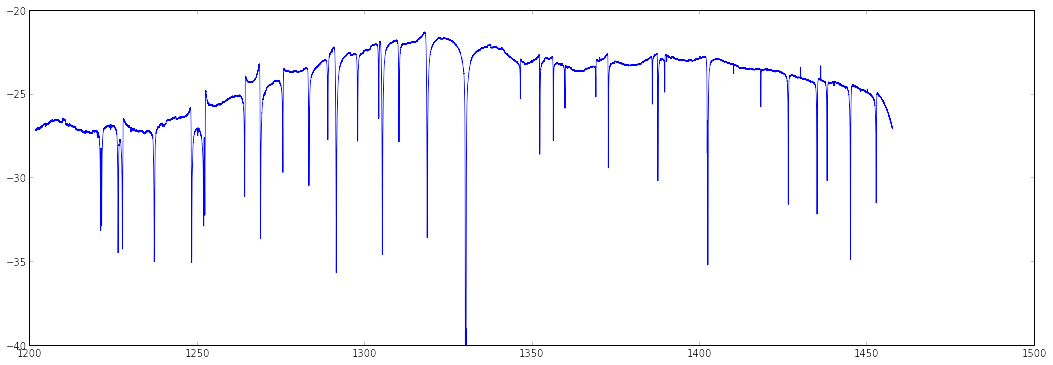

In [10]:
plot(freq,20*np.log10(np.abs(data)))
ylim(-40,-20)

In [11]:
def find_resonators(freqs,data,max_res=50,min_spacing=0.5):
    order = np.argsort(data)
    resonators = np.zeros((max_res,))
    next_index = 0
    for k,this_freq in enumerate(freqs[order]):
        if np.abs(resonators-this_freq).min() >= min_spacing:
            print "found one",next_index,this_freq
            resonators[next_index] = this_freq
            next_index +=1
            if next_index >= max_res:
                break
    return resonators

In [12]:
resonators = find_resonators(freq,20*np.log10(np.abs(data)))

found one 0 1329.9921875
found one 1 1291.328125
found one 2 1402.328125
found one 3 1248.1484375
found one 4 1236.9609375
found one 5 1444.921875
found one 6 1305.1015625
found one 7 1226.171875
found one 8 1227.46875
found one 9 1268.703125
found one 10 1318.4921875
found one 11 1220.9765625
found one 12 1251.7421875
found one 13 1434.9453125
found one 14 1426.3515625
found one 15 1452.6015625
found one 16 1263.9765625
found one 17 1283.171875
found one 18 1387.3984375
found one 19 1437.9453125
found one 20 1275.3984375
found one 21 1372.59375
found one 22 1352.125
found one 23 1221.4765625
found one 24 1226.96875
found one 25 1251.2421875
found one 26 1310.0625
found one 27 1297.7265625
found one 28 1248.6484375
found one 29 1356.1640625
found one 30 1288.8203125
found one 31 1220.46875
found one 32 1236.4375
found one 33 1219.96875
found one 34 1249.96875
found one 35 1234.03125
found one 36 1237.46875
found one 37 1218.03125
found one 38 1216.375
found one 39 1235.7578125
found on

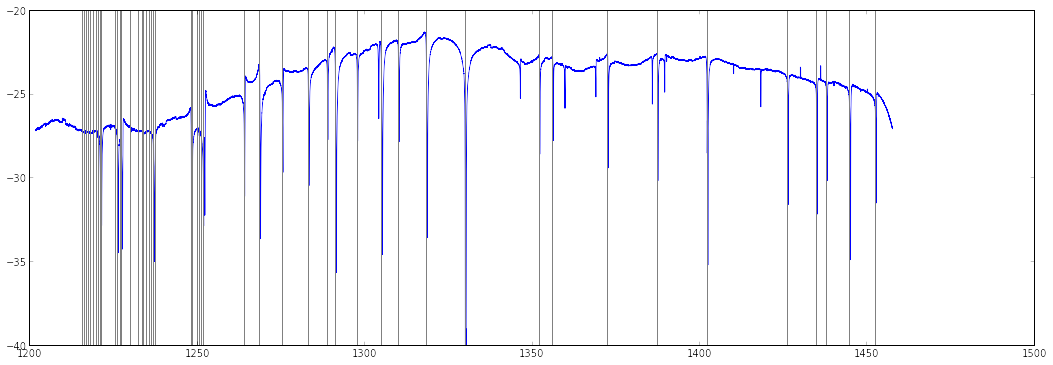

In [14]:
plot(freq,20*np.log10(np.abs(data)))
ylim(-40,-20)
ax = gca()
for res in resonators:
    ax.axvline(res,color='gray')

In [15]:
unwrapped = data*np.exp(-31.3j*2*np.pi*(freq))

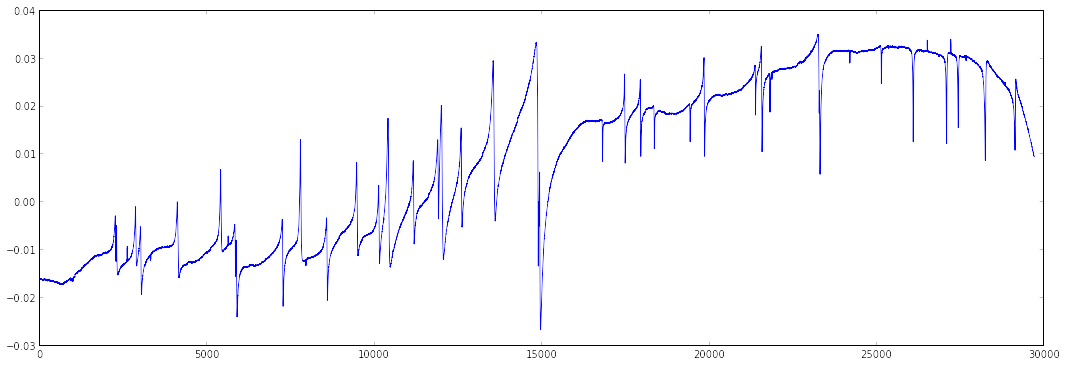

In [17]:
plot(np.angle(unwrapped+2))